# Analysis of reflectometry data
Data from Frederic C.
Searching for MHD waves

In [2]:
import math
from scipy import io
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import scipy.integrate
import pandas as pd
from IPython.display import display
import time
import matplotlib.colors as colors
import random
import glob
import os
from matplotlib import animation
from IPython.display import HTML
import copy

First, we load our signal.

In [4]:
#%%script false
#path ='C:\\Users\\Marci\\Documents\\transientwaves\\imputdata\\in\\'#pc
path ='E:\\marci main\\Fusion\\inputdata\\in\\' #pc_big
#path ='C:\\Users\\win10\\Downloads\\transient-waves\\inputdata\\in\\'#laptop

#for filename in glob.glob(os.path.join(path, '*.sav')):
#    sav1 = io.readsav(filename, python_dict = True)
#    print('Loaded: '+filename)
#    print('\n')
    
for filename in glob.glob(os.path.join(path, '*.mat')):
    sav1 = io.loadmat(filename)
    print('Loaded: '+filename)
    print('\n')

Loaded: E:\marci main\Fusion\inputdata\in\AUG32348.mat




In [5]:
print(sav1)
print(sav1['R_signal'])
print(sav1['R_signal'].shape)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Oct 14 14:41:57 2019', '__version__': '1.0', '__globals__': [], 'signal': array([[ 0.00634478+2.93461174e-02j,  0.00386267+3.16751640e-02j,
         0.00397228+2.48740042e-02j, ...,  0.03208549-2.36917265e-03j,
         0.0380862 -6.28079624e-03j,  0.03684512-4.21851383e-03j],
       [ 0.00409225+3.65559392e-02j,  0.00167809+3.87624995e-02j,
         0.00153906+3.18966301e-02j, ...,  0.03623879+5.23178505e-03j,
         0.0420346 +1.22682156e-03j,  0.04067137+3.88863083e-03j],
       [ 0.00156275+4.36018240e-02j, -0.00075504+4.56716626e-02j,
        -0.0011463 +3.87696741e-02j, ...,  0.04016374+1.28406663e-02j,
         0.04570965+8.71960047e-03j,  0.04422414+1.19783965e-02j],
       ...,
       [-0.0019706 -1.30265423e-03j, -0.00117911+7.02119151e-04j,
        -0.00268388+4.81903283e-04j, ..., -0.00169229-1.68897388e-03j,
         0.00112924-2.22086291e-03j,  0.00122499-8.59923137e-04j],
       [-0.00193071-1.362

In [6]:
#for mat files from Frederic
s=abs(np.array(sav1['signal']).T)
r=np.array(sav1['R_signal'][0])
x=np.array(sav1['t_signal'][0])

In [7]:
print(1/(x[2]-x[1]))
print(r[1]-r[2])
shot= 'AUGD 32348 UFSR'
print(abs(s[10]))
print((s[10]))

799995.9999789012
0.00024228271312276561
[0.0486131  0.05301183 0.0571885  ... 0.00103463 0.00087178 0.0008647 ]
[0.0486131  0.05301183 0.0571885  ... 0.00103463 0.00087178 0.0008647 ]


**main variables**
<br> nyquist - The Nyquist frequency of the signal - biggest recommended calculation range
<br> frangemax - x axis length of Fourier-transform, note, that this does not affect Fourier calculation
<br> 
<br> samples - sample points of the first graph
<br> s_rate - sample rate (Hz)

In [8]:
#%%script false
#s = s.astype(float)
#x = x.astype(float)
samples=x.size
channels = int(s.size/samples)
t=max(x)-min(x)
print(min(x))
print(max(x))
nyquist=samples/2/t
frangemax=nyquist#250000#
xf=np.linspace(0.0, frangemax, int(frangemax*t+1))
s_rate=x.size/t
print(nyquist)
print(samples)
view=0

1.2000005000025
1.224999374996875
400018.00090004405
20000


The widget below controls the wisible range of the chart under it. Note that this is only for visualisation, the program calculates with the whole 0 - t range. The zooming is exponential. Value 0 displays the whole range.

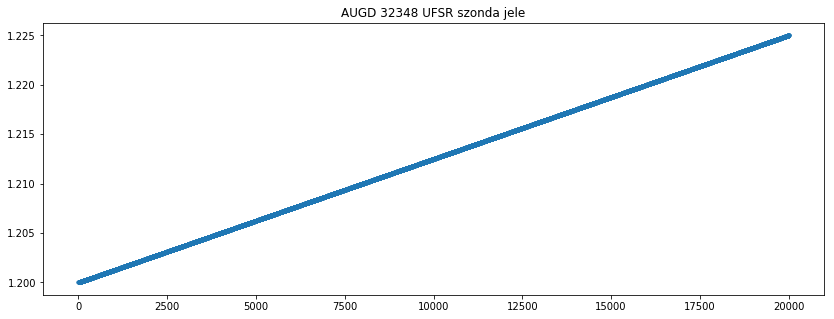


 AUGD 32348 UFSR


In [9]:
#%%script false
plt.figure(figsize=(14,5))
plt.title(shot+' szonda jele')
plt.plot(x,'.-')
#yaxismax=1/2**(view.value/12)
#plt.xlim(min(x),max(x)-(max(x)-min(x))*((view/100.4)**0.6))
#plt.ylabel('radiális mágneses tér változás (T/s)')
#plt.xlabel('idő (s)')
#plt.savefig(shot+' in.pdf')
plt.show()

print("\n",shot)

The script provided at   *augtwiki/bin/view/Reflectometry/Read*   to load reflectometries

In [27]:
print(r.shape)
print(s.shape)

plt.figure(figsize=(8,6))
plt.plot(r,s[0],'.-')#.data[1000,:]
#plt.title('%s @ t=%3.2fs'%(nl.description, time[1000]))
#plt.ylabel(nl.unit)
#plt.xlabel('R [%s]' %(rl.units))
plt.show()

TypeError: 'int' object is not callable

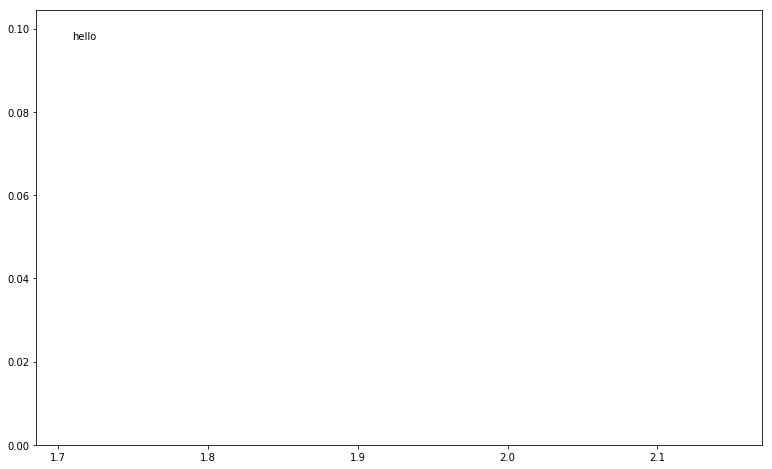

In [11]:
##Read the data



fig = plt.figure(figsize=(13,8))
ax = plt.axes(xlim=(np.min(r), np.max(r)), ylim=(np.min(s), np.max(s)))
time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes)
line, = plt.plot([], [], lw=3)

def init():
    line.set_data([], [])
    time_text.set_text('hello')
    return line, time_text
def animate(i):
    line.set_data(r,s[i])
    time_text.set_text(str(x[i])[:10]+" s")
    return line, time_text

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=100, repeat_delay=1000, repeat=True, blit=True)

# anim.save('FRS_profiles.gif', writer='imagemagick')
#https://www.wikihow.com/Install-FFmpeg-on-Windows
#https://stackoverflow.com/questions/20137792/using-ffmpeg-and-ipython

In [64]:
from matplotlib.animation import FFMpegWriter
writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1000)
anim.save("UFSR1.mp4", writer=writer)

In [83]:
HTML(anim.to_html5_video())

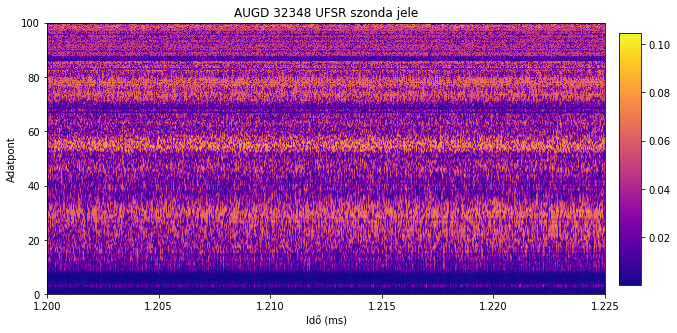

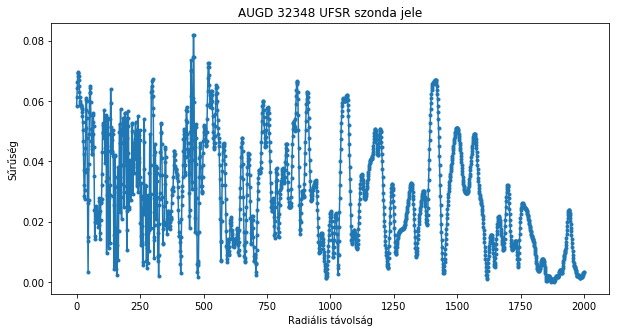

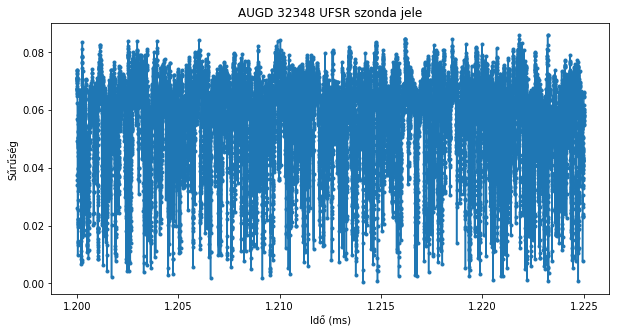

IndexError: too many indices for array

<Figure size 720x360 with 0 Axes>

In [12]:
#ne2=np.transpose(ne)
plt.figure(figsize=(10,5))
plt.imshow(s.T,aspect='auto',cmap='plasma', extent=[min(x),max(x),0,100])
plt.title(shot+' szonda jele')
plt.xlabel('Idő (ms)')
plt.ylabel('Adatpont')
cax = plt.axes([0.92, 0.15, 0.03, 0.7])
plt.colorbar(cax=cax).set_label('')
#plt.subplots_adjust(right=0.95)
#plt.savefig(shot+' fullprofile.pdf')
plt.show()


plt.figure(figsize=(10,5))
plt.plot(s[2100,:],'.-')
plt.title(shot+' szonda jele')
plt.ylabel('Sűrűség')
plt.xlabel('Radiális távolság')
#plt.savefig(shot+' profile 200.pdf')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(x,s[:,30],'.-')
plt.title(shot+' szonda jele')
plt.xlabel('Idő (ms)')
plt.ylabel('Sűrűség')
#plt.savefig(shot+' at freq 30.pdf')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(x,r[:,30],'.-')
plt.title(shot+' szonda jele')
plt.xlabel('Idő (ms)')
plt.ylabel('Radiális távolság')
#plt.savefig(shot+' at freq 30.pdf')
plt.show()

## Short-time Fourier transform

We slice the signal up, then from each slice, we substract its average and multiply it with a gaussian window.

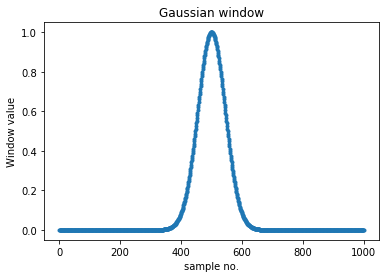

In [89]:
win_r = 500 #1000
d_win=5#random.randint(200,300)
std=45 #150
win_base = scipy.signal.gaussian(2*win_r+1, std=std)#np.wining(2*win_r+1)

plt.plot(win_base,".-")
plt.title('Gaussian window')
plt.xlabel('sample no.')
plt.ylabel('Window value')
plt.show()

## Radial profile
at given time

11999


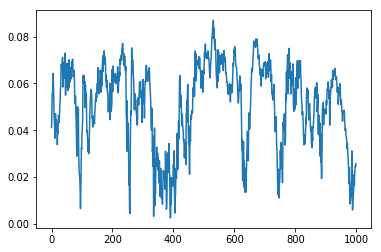

In [75]:
target_t=1.215
i_t = 0
for i in range(x.size):
    if x[i]<target_t:
        i_t = i
print(i_t)

plt.plot(s[i_t-win_r:i_t+win_r,10])

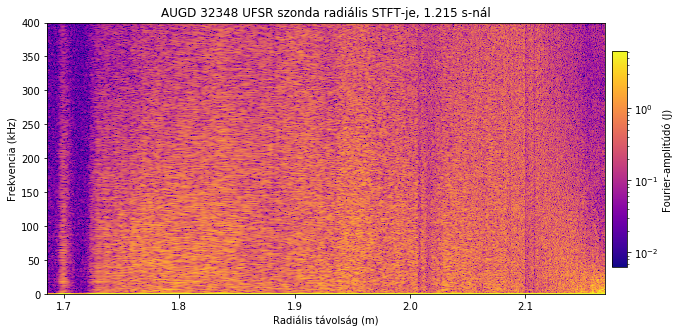

In [100]:
r_stft = np.zeros((win_r+1,np.size(r)))
for i in range(np.size(r)):
    r_stft[:,i] = np.abs(scipy.fftpack.fft(s[i_t-win_r:i_t+win_r,i]))[:win_r+1]
    
    
min_r=min(r)#1.7#
max_r=max(r)#1.73#

#colornorm=colors.LogNorm(vmin=r_stft.min()*10000, vmax=r_stft.max()/1)
colornorm=colors.LogNorm(vmin=r_stft.max()/10**4, vmax=r_stft.max()/10**1)
logax = np.linspace(int(np.log10(r_stft.min())),int(np.log10(r_stft.max())),int(np.log10(r_stft.max()))-int(np.log10(r_stft.min()))+1)
logax = 10**logax
fig, ax = plt.subplots(figsize=(10,5))
#extent=[0,t-(2*hann_r/s_rate),0,frangemax/t],
#plt.figure(figsize=(15,10))
#ax.plot(x,np.abs(full_f),color='g',linewidth=3,linestyle='dashed',alpha=0.6)#img = ax.
img = plt.imshow(r_stft,cmap='plasma',  aspect='auto', extent=[max(r),min(r),frangemax/1000,0], norm=colornorm)#interpolation='gaussian',*30000000/4
plt.title(shot+' szonda radiális STFT-je, '+str(target_t)+' s-nál')
plt.ylabel('Frekvencia (kHz)')
plt.xlabel('Radiális távolság (m)')#('time (s)')
plt.xlim(min_r,max_r)
#plt.ylim(90,30)
plt.subplots_adjust(right=0.90)
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
cbar=plt.colorbar(img,cax=plt.axes([0.91, 0.2, 0.02, 0.6]),ticks=None)
cbar.set_label('Fourier-amplitúdó (J)')
#plt.axis([2.13,2.15,min(s),20000])
#cbar.set_ticks(logax)
plt.savefig(shot+' '+str(target_t)+' s,'+ "%.2f" % min_r +'-'+"%.2f" % (max_r)+' m stft.pdf')#34924_40
plt.show()

## Time evolution
at given radial position

In [63]:
target_r=1.702
i_r = 0
for i in range(r.size):
    if r[i]>target_r:
        i_r = i
print(i_r)
print(s[:,i_r].shape)

1930
(20000,)


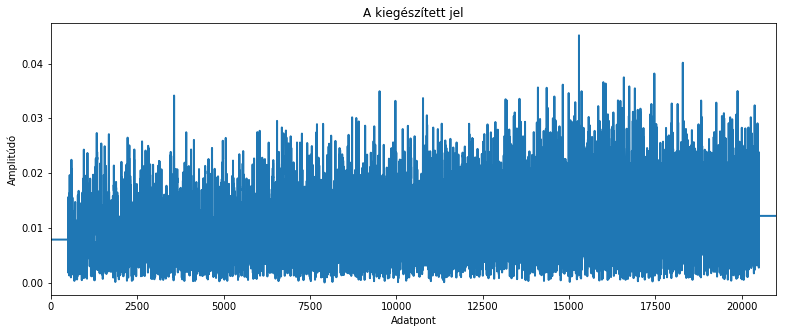

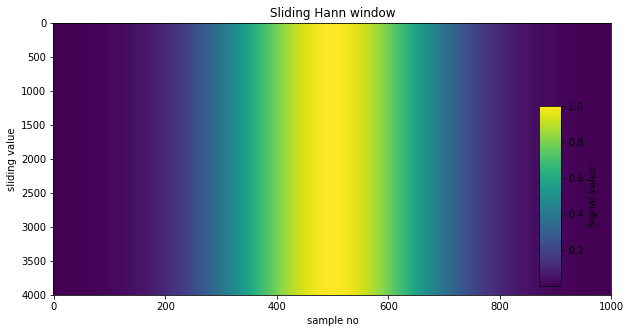

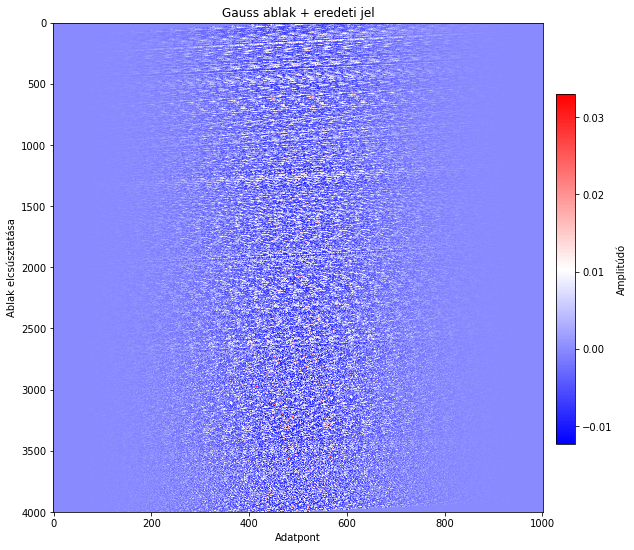

1.0459891154842079e-09
0.42957171897259067
145
(4000, 501)
(501, 4000)


In [64]:
z_padded_s = np.zeros (samples+2*win_r)
z_padded_s[win_r:-win_r] = s[:,i_r]
z_padded_s[0:win_r]=np.average(z_padded_s[win_r+1:2*win_r])
z_padded_s[-win_r:]=np.average(z_padded_s[-2*win_r:-win_r-1])
x_win=np.linspace(0.0, t+(2*win_r/s_rate), samples+2*win_r)

plt.figure(figsize=(13,5))
plt.plot(z_padded_s,"-",linewidth = 2)#x_win,idő (s),max(x_win)
plt.xlim((0,samples+2*win_r))
plt.title('A kiegészített jel')
plt.xlabel('Adatpont')
plt.ylabel('Amplitúdó')
plt.savefig('sxr2_p.pdf')
plt.show()


win = np.zeros((int(samples/d_win+1), 2*win_r+1))
for i in range(int(samples/d_win+1)):
    win [i]=win_base

plt.figure(figsize=(10,5))
plt.imshow(win,aspect='auto')
plt.title('Sliding Hann window')
plt.xlabel('sample no')
plt.ylabel('sliding value')
#plt.subplots_adjust(right=0.95)
cax = plt.axes([0.8, 0.15, 0.03, 0.5])
plt.colorbar(cax=cax).set_label('Signal value')
plt.show()

z_win = np.zeros((int(samples/d_win+0.9), win_r*2+1))
for i in range(int(samples/d_win+0.9)):
    z_win[i] = win[i] * (z_padded_s [d_win*i:d_win*i+win_r+win_r+1]-np.average(z_padded_s [d_win*i:d_win*i+win_r+win_r+1]))
    #z_win[i] = win[i] * (z_padded_s [d_win*i:d_win*i+win_r+win_r+1])

plt.figure(figsize=(9,9))
plt.imshow(z_win,aspect='auto',cmap='bwr')#, extent=(min(x)*s_rate/d_win,max(x)*s_rate/d_win,max(x)*s_rate,min(x)*s_rate)
plt.title('Gauss ablak + eredeti jel')
plt.xlabel('Adatpont')
plt.ylabel('Ablak elcsúsztatása')
plt.subplots_adjust(right=0.88)
cax = plt.axes([0.90, 0.23, 0.03, 0.54])
plt.colorbar(cax=cax).set_label('Amplitúdó')
plt.savefig('z_win.pdf')
plt.show()

z_win_fft = np.zeros((int(samples/d_win+0.9), win_r+1))
for i in range(int(samples/d_win+0.9)):
    z_win_fft[i] = np.abs(scipy.fftpack.fft(z_win[i]))[:win_r+1]  
t1=time.time()

print(z_win_fft.min()**2)
print(z_win_fft.max()**2)
print(std)

z_win_fft_sq = (z_win_fft.T)**2
print(z_win_fft.shape)
print(z_win_fft_sq.shape)

We can display the calculated STFT.

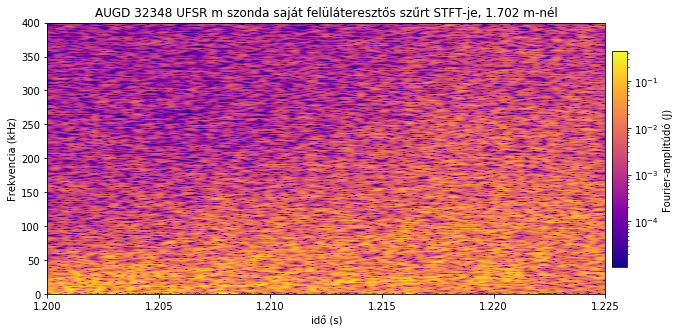

In [65]:
##### %%script false
colornorm=colors.LogNorm(vmin=z_win_fft_sq.min()*10000, vmax=z_win_fft_sq.max()/1)
logax = np.linspace(int(np.log10(z_win_fft_sq.min())),int(np.log10(z_win_fft_sq.max())),int(np.log10(z_win_fft_sq.max()))-int(np.log10(z_win_fft_sq.min()))+1)
logax = 10**logax
fig, ax = plt.subplots(figsize=(10,5))
#extent=[0,t-(2*hann_r/s_rate),0,frangemax/t],
#plt.figure(figsize=(15,10))
#ax.plot(x,np.abs(full_f),color='g',linewidth=3,linestyle='dashed',alpha=0.6)#img = ax.
img = plt.imshow(z_win_fft_sq,cmap='plasma',  aspect='auto', extent=[min(x),max(x),frangemax/1000,0], norm=colornorm)#interpolation='gaussian',*30000000/4
plt.title(shot+' m szonda saját felüláteresztős szűrt STFT-je, '+str(target_r)+' m-nél')
plt.ylabel('Frekvencia (kHz)')
plt.xlabel('idő (s)')#('time (s)')
#plt.xlim(0.642,0.658)
#plt.ylim(90,30)
plt.subplots_adjust(right=0.90)
plt.gca().invert_yaxis()
cbar=plt.colorbar(img,cax=plt.axes([0.91, 0.2, 0.02, 0.6]),ticks=None)
cbar.set_label('Fourier-amplitúdó (J)')
#plt.axis([2.13,2.15,min(s),20000])
#cbar.set_ticks(logax)
plt.savefig(shot+' '+str(target_r)+' m stft.pdf')#34924_40
plt.show()

In [30]:
#Finding the ridge
#%%script false
#ridge_no = 1
print(samples/d_win)

print(s_rate-0.9)
print(nyquist/((2*win_r+1)/s_rate-0.9))
ridge_d=2000#50#
ridge_d2=800
ridge_start=4000#2#   #start frequency for following the ridge
ridge = np.zeros(int(samples/d_win+0.9))
ridge_h = np.zeros(int(samples/d_win+0.9))
maxi=z_win_fft.max()/40
print(maxi)

for i in range(int(samples/d_win+0.9)):
    ridgeval=0  #max(z_spy_stft[i][:])
    if (i==0) or (ridge[i-1]==0):   #find new ridge - a start or lost the ridge
        for j in range(int(ridge_d*(2*win_r+1)/(s_rate-0.9))):
            j2=j+int((ridge_start)*(2*win_r+1)/(s_rate-0.9))
            print(j2)
            if ridgeval < z_win_fft[i][j2]:
                ridgeval=z_win_fft[i][j2]
                ridge[i]= j2
    else:
        for j in range(int(ridge_d2*(2*win_r+1)/(s_rate-0.9))):
            j2=int(j+ridge[i-1]-(ridge_d2/2)*(2*win_r+1)/(s_rate-0.9))
            if ridgeval < z_win_fft[i][j2]:
                ridgeval=z_win_fft[i][j2]
                ridge[i]= j2
                #print(j2, z_spy_stft[j2][i])
    if ridgeval<(maxi):
        ridgeval =0
        ridge [i]=0
    ridge_h[i]=ridgeval**(1/2)
    #print(i, ridge [i])
    #print (i,"  ",ridge[i],"\t", ridgeval,"\t", z_spy_stft[i][int(ridge[i])])

ridge=ridge*(s_rate/(2*win_r+1))

#proc_x=np.linspace(min(x),max(x),np.size(ridge))
ridge[ ridge==0 ] = np.nan
plt.figure(figsize=(14,3.5))
plt.title(shot+' szonda maximum frekvenciaértékei')
plt.plot(np.linspace(min(x),max(x),np.size(ridge)),ridge/1000,'.-')
plt.grid(True)
#plt.legend(('Kiszámolt', 'Eredeti'))
#yaxismax=1/2**(view.value/12)
plt.xlim(min(x),max(x))
#plt.ylim(ridge_start/1100,)
#plt.ylim(0,200)
#plt.xlim(0.89,0.91)
plt.ylabel('Frekvencia (kHz)')
plt.xlabel('idő (s)')
#plt.savefig(shot+' f_max.pdf')
plt.show()

909.6
2014.4275628744117
-2498.5058668966303
1.7145541919308796e+19
496
497
498
499
500
501


IndexError: index 501 is out of bounds for axis 0 with size 501

In [ ]:
logax = np.linspace(int(np.log10(z_win_fft_sq.min())),int(np.log10(z_win_fft_sq.max())),int(np.log10(z_win_fft_sq.max()))-int(np.log10(z_win_fft_sq.min()))+1)
logax = 10**logax
fig, ax = plt.subplots(figsize=(14,5))
#extent=[0,t-(2*hann_r/s_rate),0,frangemax/t],
#plt.figure(figsize=(15,10))
ax.plot(np.linspace(min(x),max(x),np.size(ridge)),ridge/1000,'.',color='g',alpha=0.6)#,linewidth=3,linestyle='dashed')#img = ax.
img = plt.imshow(z_win_fft_sq,cmap='plasma', interpolation='gaussian', aspect='auto', extent=[min(x),max(x),frangemax/1000,0], norm=colornorm)#
#plt.title('My Short-time Fourier transform')
plt.title(shot+'-es szonda STFT-je, adaptív maximumkereséssel')
plt.ylabel('Frekvencia (kHz)')
plt.xlabel('idő (s)')#('time (s)')
#plt.xlim(0.652,0.66)
#plt.ylim(90,40)
plt.subplots_adjust(right=0.90)
plt.gca().invert_yaxis()
cbar=plt.colorbar(img,cax=plt.axes([0.91, 0.2, 0.02, 0.6]),ticks=None)
cbar.set_label('Fourier-érték (J)')
#plt.axis([2.13,2.15,min(s),20000])
cbar.set_ticks(logax)
#plt.savefig(shot+' stft_max.pdf')
plt.show()

In [ ]:
ridge_h[ ridge_h==0 ] = np.nan
print(maxi**(1/2))
plt.figure(figsize=(10,3.5))
plt.title('Az amplitúdó a maximum frekvenciaértékeknél, '+shot)#, AUGD 34924 J051-es szonda
plt.plot(np.linspace(min(x),max(x),np.size(ridge_h)),ridge_h,'-',markersize=1)#,x,3*abs(np.sin(2*np.pi*x))+2,
plt.grid(True)
plt.xlim(min(x),max(x))
#plt.xlim(0.89,0.91)
#plt.ylim(maxi**(1/2)/2,max(ridge_h)*1.05)
plt.ylabel('Amplitúdó')
plt.xlabel('idő (s)')
#plt.yscale("log")
#plt.savefig(shot+'_amp.pdf')
plt.show()